In [1]:
import netCDF4
url=r"C:\Users\sathishm\OneDrive - Qualcomm\Desktop\bi_2019.nc"
dataset = netCDF4.Dataset(url)
print(dataset)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    geospatial_bounds_crs: EPSG:4326
    Conventions: CF-1.6
    geospatial_bounds: POLYGON((-124.7666666333333 49.400000000000000, -124.7666666333333 25.066666666666666, -67.058333300000015 25.066666666666666, -67.058333300000015 49.400000000000000, -124.7666666333333 49.400000000000000))
    geospatial_lat_min: 25.066666666666666
    geospatial_lat_max: 49.40000000000000
    geospatial_lon_min: -124.7666666333333
    geospatial_lon_max: -67.058333300000015
    geospatial_lon_resolution: 0.041666666666666
    geospatial_lat_resolution: 0.041666666666666
    geospatial_lat_units: decimal_degrees north
    geospatial_lon_units: decimal_degrees east
    coordinate_system: EPSG:4326
    author: John Abatzoglou - University of Idaho, jabatzoglou@uidaho.edu
    date: 30 January 2020
    note1: The projection information for this file is: GCS WGS 1984.
    note2: Citation: Abatzoglou, J.T., 2013, Developmen

In [2]:
print(dataset.variables.keys())

dict_keys(['lon', 'lat', 'day', 'crs', 'burning_index_g'])


In [3]:
print(dataset.variables['burning_index_g'])

<class 'netCDF4._netCDF4.Variable'>
uint16 burning_index_g(day, lat, lon)
    _FillValue: 32767
    units: Unitless
    description: BI-G
    long_name: bi
    standard_name: bi
    missing_value: 32767
    dimensions: lon lat time
    grid_mapping: crs
    coordinate_system: WGS84,EPSG:4326
    scale_factor: 1.0
    add_offset: 0.0
    coordinates: lon lat
    _Unsigned: true
unlimited dimensions: 
current shape = (365, 585, 1386)
filling on


In [4]:
for d in dataset.dimensions.items():
    print(d)

('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 1386)
('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 585)
('day', <class 'netCDF4._netCDF4.Dimension'>: name = 'day', size = 365)
('crs', <class 'netCDF4._netCDF4.Dimension'>: name = 'crs', size = 1)


In [5]:
burning_index_g = dataset.variables['burning_index_g']

In [6]:
temp = burning_index_g[322].data

In [7]:
display(temp.shape)

(585, 1386)

In [8]:
lon = dataset.variables['lon'][:].data

In [9]:
lat = dataset.variables['lat'][:].data

In [10]:
import numpy as np
import matplotlib.pyplot as plt

SD_county_lats = np.where((lat<33.6) & (lat>32.4))
SD_county_lons = np.where((lon<-116.0) & (lon>-118))

In [11]:
burning_index_g_220 = burning_index_g[220][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]

In [12]:
burning_index_g_220

masked_array(
  data=[[24.0, 22.0, 24.0, ..., 77.0, 78.0, 78.0],
        [--, --, 23.0, ..., 75.0, 75.0, 76.0],
        [--, --, --, ..., 74.0, 74.0, 75.0],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [ True,  True, False, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=32767.0)

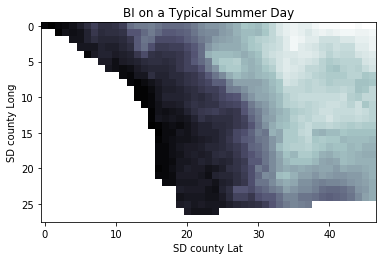

In [15]:
plt.imshow(burning_index_g_220, cmap='bone', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("BI on a Typical Summer Day")
plt.show()

In [16]:
burning_index_g_40 = burning_index_g[40][SD_county_lats[0][0]:SD_county_lats[0][-1],SD_county_lons[0][0]:SD_county_lons[0][-1]]

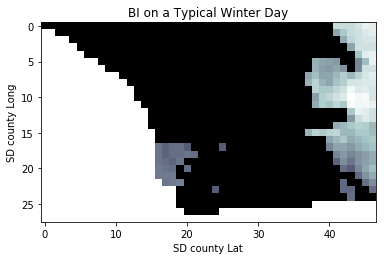

In [17]:
plt.imshow(burning_index_g_40, cmap='bone', interpolation='nearest')
plt.xlabel("SD county Lat")
plt.ylabel("SD county Long")
plt.title("BI on a Typical Winter Day")
plt.show()